# Filtering algorithms - analysis

## Savistky-Golay

In [1]:
# load data
%matplotlib inline

# Some usual imports here
import csv as csv 
import numpy as np

######################################
### PROCESS LIGHTER FLAME LOG FILE ###
######################################

# vars
# expected record length
iRecLen = 12
# lists of values
iFA = []
iFB = []
iG= []

logfilename = "data/Test45.log"
file = open(logfilename, "r")
for line in file:
    line = line.rstrip()
    if(len(line) == iRecLen):
        # FlameA, FlameB and Guard detector analogue readings
        iFA.append(int(line[0:2], 16))
        iFB.append(int(line[2:4], 16))
        iG.append(int(line[4:6], 16))
        
# Lighter flame data lists converted to numpy arrays
iFAlfd = np.asarray(iFA)
iFBlfd = np.asarray(iFB)
iGlfd = np.asarray(iG) 

# Create index array for our x axis time series
iIdx = np.arange(1, iGlfd.size + 1, 1)
print("LIGHTER FLAME DATA")
print("FlameA array size = " + str(iFAlfd.size))
print("FlameB array size = " + str(iFBlfd.size))
print("Guard array size = " + str(iGlfd.size))
print("Index iIdx count = " + str(iIdx.size))

LIGHTER FLAME DATA
FlameA array size = 6032
FlameB array size = 6032
Guard array size = 6032
Index iIdx count = 6032


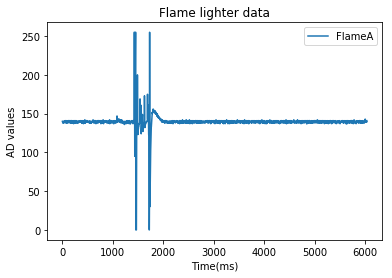

In [2]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(iIdx, iFAlfd, label='FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Flame lighter data")
plt.legend()
plt.show()

In [3]:
########################################
### PROCESS RF INTERFERENCE LOG FILE ###
########################################

# Note, we are reusing variable names to process the second file
# vars
# expected record length
iRecLen = 12
# lists of values
iFA = []
iFB = []
iG= []

logfilename = "data/Test48.log"
file = open(logfilename, "r")
for line in file:
    line = line.rstrip()
    if(len(line) == iRecLen):
        # FlameA, FlameB and Guard detector analogue readings
        iFA.append(int(line[0:2], 16))
        iFB.append(int(line[2:4], 16))
        iG.append(int(line[4:6], 16))
        
# Lighter flame data lists converted to numpy arrays
iFArfd = np.asarray(iFA)
iFBrfd = np.asarray(iFB)
iGrfd = np.asarray(iG) 

# Create index array for our x axis time series
iIdx = np.arange(1, iGrfd.size + 1, 1)
print("RF INTERFERENCE DATA")
print("FlameA array size = " + str(iFArfd.size))
print("FlameB array size = " + str(iFBrfd.size))
print("Guard array size = " + str(iGrfd.size))
print("Index iIdx count = " + str(iIdx.size))

RF INTERFERENCE DATA
FlameA array size = 29096
FlameB array size = 29096
Guard array size = 29096
Index iIdx count = 29096


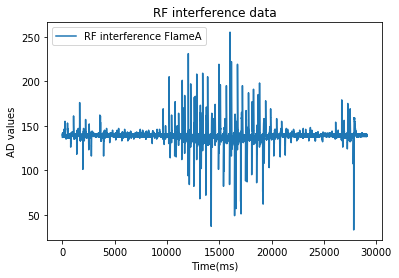

In [12]:
# Now now we look at the data, which like flame data, is acquired every 10ms 
# so that gives us the same base for our time series on the X axis
# The data is also represented as an unsigned byte ranging from 0 to 255 
# giving us the interval for our Y axis
# First we look at Flame A detector for our RF data using again pyplot from matplotlib
plt.clf()
plt.plot(iFArfd, label='RF interference FlameA')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference data")
plt.legend()
plt.show()

In [5]:
iFAlfd_sliced = iFAlfd[950:2100:1]
iFBlfd_sliced = iFBlfd[950:2100:1]
iGlfd_sliced = iGlfd[950:2100:1]
iIdx_sliced = np.arange(1, iGlfd_sliced.size + 1, 1)
# Let's look at our new array sizes
print("SLICED LIGHTER FLAME DATA")
print("FlameA sliced array size = " + str(iFAlfd_sliced.size))
print("FlameB sliced array size = " + str(iFBlfd_sliced.size))
print("Guard sliced array size = " + str(iGlfd_sliced.size))
print("Index sliced iIdx count = " + str(iIdx_sliced.size))

SLICED LIGHTER FLAME DATA
FlameA sliced array size = 1150
FlameB sliced array size = 1150
Guard sliced array size = 1150
Index sliced iIdx count = 1150


<Figure size 432x288 with 0 Axes>

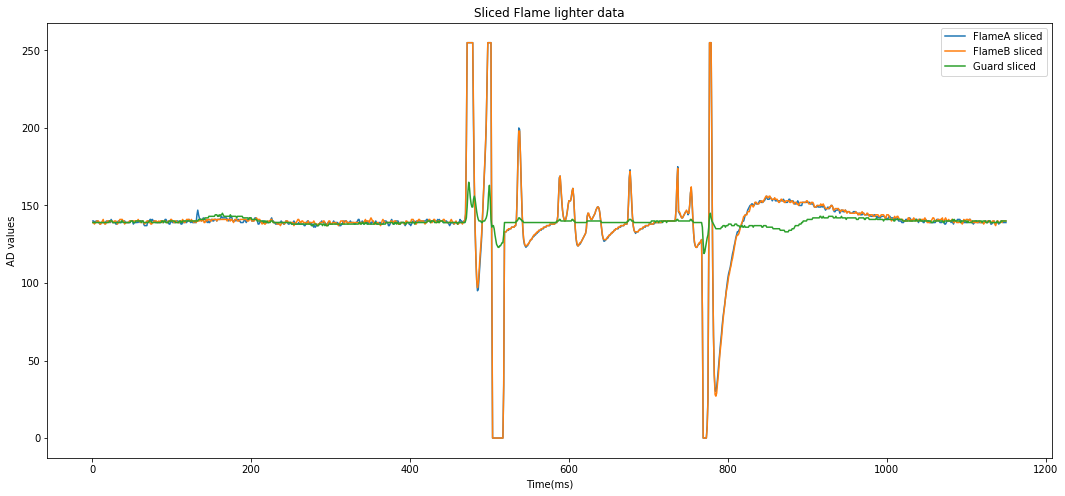

In [6]:
# Now we plot our sliced data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iIdx_sliced, iFAlfd_sliced, label='FlameA sliced')
plt.plot(iIdx_sliced, iFBlfd_sliced, label='FlameB sliced')
plt.plot(iIdx_sliced, iGlfd_sliced, label='Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("Sliced Flame lighter data")
plt.legend()
plt.show()

In [7]:
iIdxStart = 14500
iIdxEnd = 15650
iFArfd_sliced = iFArfd[iIdxStart:iIdxEnd:1]
iFBrfd_sliced = iFBrfd[iIdxStart:iIdxEnd:1]
iGrfd_sliced = iGrfd[iIdxStart:iIdxEnd:1]
iIdx_sliced = np.arange(1, iGrfd_sliced.size + 1, 1)
# Let's look at our new array sizes
print("SLICED LIGHTER FLAME DATA")
print("FlameA sliced array size = " + str(iFArfd_sliced.size))
print("FlameB sliced array size = " + str(iFBrfd_sliced.size))
print("Guard sliced array size = " + str(iGrfd_sliced.size))
print("Index sliced iIdx count = " + str(iIdx_sliced.size))

SLICED LIGHTER FLAME DATA
FlameA sliced array size = 1150
FlameB sliced array size = 1150
Guard sliced array size = 1150
Index sliced iIdx count = 1150


<Figure size 432x288 with 0 Axes>

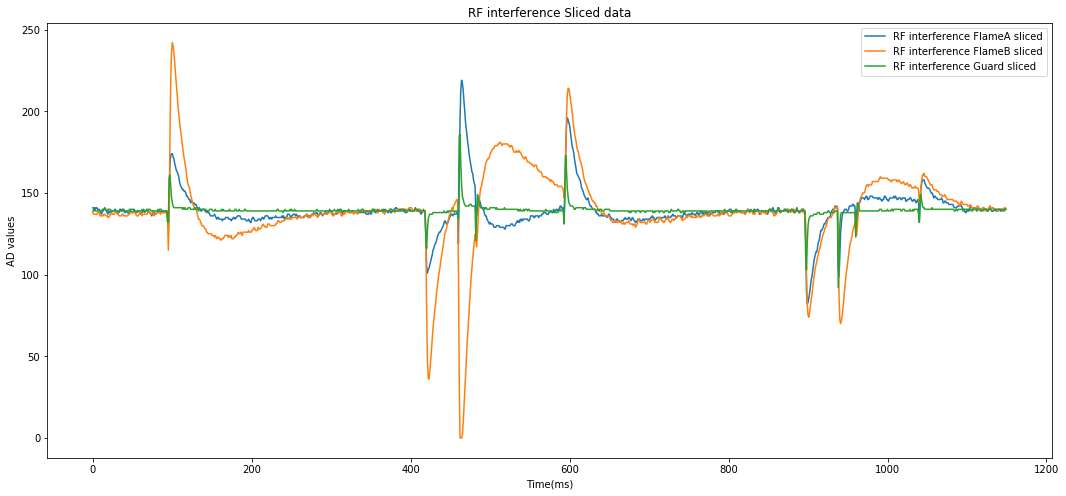

In [14]:
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(iFArfd_sliced, label='RF interference FlameA sliced')
plt.plot(iFBrfd_sliced, label='RF interference FlameB sliced')
plt.plot(iGrfd_sliced, label='RF interference Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference Sliced data")
plt.legend()
plt.show()

## Normalisation function
We will use the minimum and maximum observations across all attributes being compared:
    
$$ z{_i}=\frac{x{_i}-min}{max-min} \forall max-min>0 $$

**TODO** change symbol to not equal to zero

In [72]:
# add a normalised column, our first engineered feature
def norm(x, iMin, iMax):
    # need to add a safety net here, in case max and min are the same
    if((iMax - iMin) == 0):
        return 0;
    return (x - iMin) / (iMax - iMin)

In [24]:
# Let's try to tidy this up a little bit, first off, create a single array
Farr = np.zeros((iFArfd_sliced.size, 3))

<Figure size 432x288 with 0 Axes>

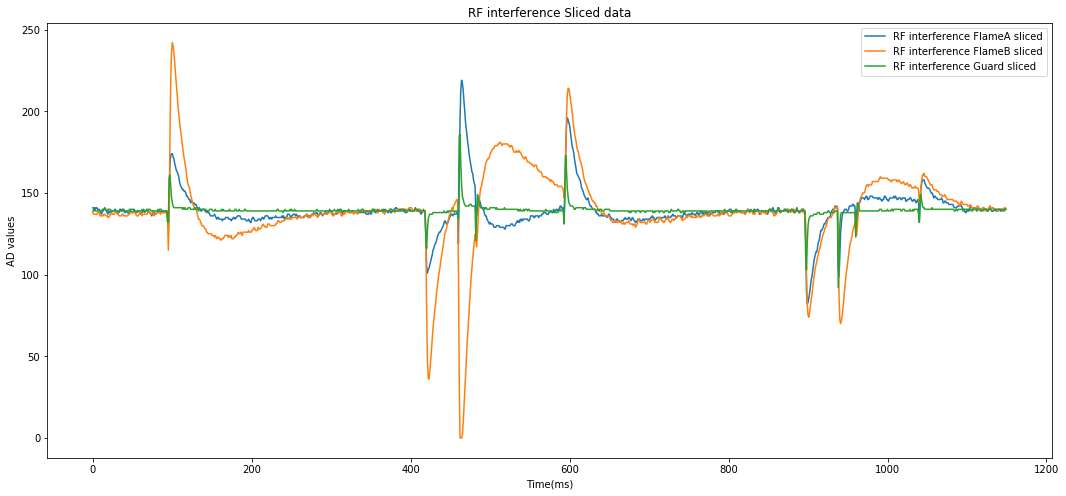

In [31]:
# so now we carry on with this scheme, turning our rows sideways, so the attribute (FlameA, FlameB, Guard) will be
# proper attributes, and the observations (individual values) will be rows
# and assign each sequence of observations to a column (axis = 1)
# first let's create some indexes and use them from now on, least we'll get confused and start missing out detail
idxFa = 0 # Flame A index
idxFb = 1 # Flame B index
idxG = 2 # Guard index
Farr[:,idxFa] = iFArfd_sliced
Farr[:,idxFb] = iFBrfd_sliced
Farr[:,idxG] = iGrfd_sliced
# Now plot again to make sure we have not lots the plot
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(Farr[:,idxFa], label='RF interference FlameA sliced')
plt.plot(Farr[:,idxFb], label='RF interference FlameB sliced')
plt.plot(Farr[:,idxG], label='RF interference Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference Sliced data")
plt.legend()
plt.show()
# Good, that looks pretty much the same, next let's add our engineered feature

<Figure size 432x288 with 0 Axes>

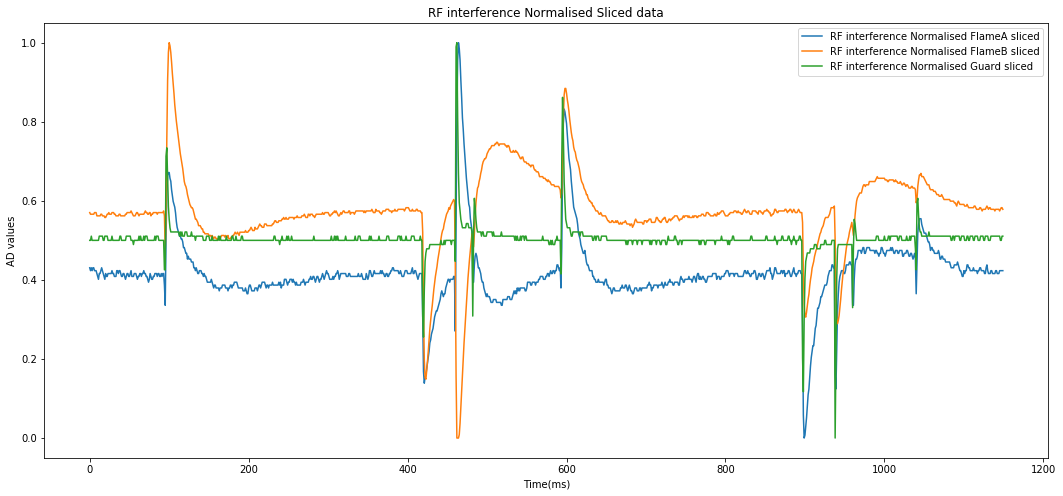

In [61]:
# create another 3 indexes
idxFaNorm = 3 # Normalised Flame A index
idxFbNorm = 4 # Normalised Flame B index
idxGNorm = 5 # Normalised Guard index
# append the normalised data to our working Farr array, column by column
norm(Farr[:,idxFa])
# and make the code more readable
nArrFa = norm(Farr[:,idxFa]).reshape(Farr[:,idxFa].size, 1) # NB size in reshape method should be the same for any idex
Farr = np.concatenate((Farr,nArrFa), axis=1)
nArrFb = norm(Farr[:,idxFb]).reshape(Farr[:,idxFb].size, 1)
Farr = np.concatenate((Farr,nArrFb), axis=1)
nArrG = norm(Farr[:,idxG]).reshape(Farr[:,idxG].size, 1)
Farr = np.concatenate((Farr,nArrG), axis=1)                      
# and plot the normalised data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(Farr[:,idxFaNorm], label='RF interference Normalised FlameA sliced')
plt.plot(Farr[:,idxFbNorm], label='RF interference Normalised FlameB sliced')
plt.plot(Farr[:,idxGNorm], label='RF interference Normalised Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference Normalised Sliced data")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

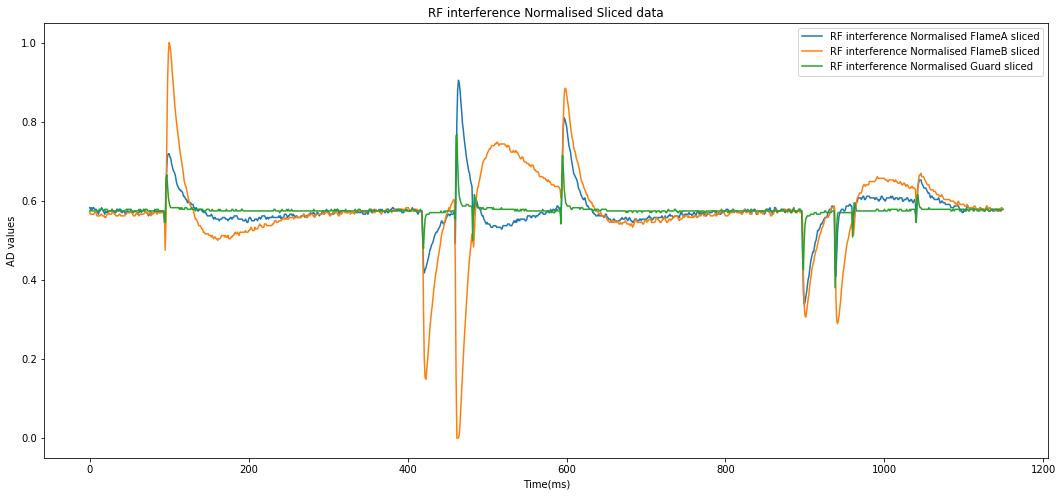

In [81]:
# There obviously is some distortion here, it looks like the maximum and minimum values of our
# norm function must be computed across all attributes
arrMax = np.max([Farr[:,idxFa].max(), Farr[:,idxFb].max(), Farr[:,idxG].max()])
arrMin = np.min([Farr[:,idxFa].min(), Farr[:,idxFb].min(), Farr[:,idxG].min()])
# start again, edit arrays with new normalised values
Farr[:,idxFaNorm] = norm(Farr[:,idxFa], arrMin, arrMax)
Farr[:,idxFbNorm] = norm(Farr[:,idxFb], arrMin, arrMax)
Farr[:,idxGNorm] = norm(Farr[:,idxG], arrMin, arrMax)               
# and plot the normalised data
plt.clf()
plt.figure(figsize=(18,8))
plt.plot(Farr[:,idxFaNorm], label='RF interference Normalised FlameA sliced')
plt.plot(Farr[:,idxFbNorm], label='RF interference Normalised FlameB sliced')
plt.plot(Farr[:,idxGNorm], label='RF interference Normalised Guard sliced')
plt.xlabel('Time(ms)')
plt.ylabel('AD values')
plt.title("RF interference Normalised Sliced data")
plt.legend()
plt.show()
# that's better

In [ ]:
# our next engineered feature will be a distance function which is the absolute difference between Flame A and Flame B.
# We observed flame data where both values of Flame A and Flame B are similar, and noise (interference) data where
# both values tend to be different, so we will engineer a feature, then plot it, to show us the absolute difference 
# magnitude. NB Our distance function will be the absolute difference of the normalised values

## Flame distance function
$$ Fd = |Nfa - Nfb| , \mid x\mid $$

